<a href="https://colab.research.google.com/github/likeshd/datascience_case_study/blob/alpha/books_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [5]:
books = pd.read_csv("/content/books_data.csv")
books.head(5)

,bookID,title,authors,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [7]:
books.isnull().sum()

bookID            0
title             0
authors           0
average_rating    0
dtype: int64

In [9]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating'], dtype='object')

In [19]:
?sns.histplot
?plt.figure

<Axes: xlabel='average_rating', ylabel='Count'>

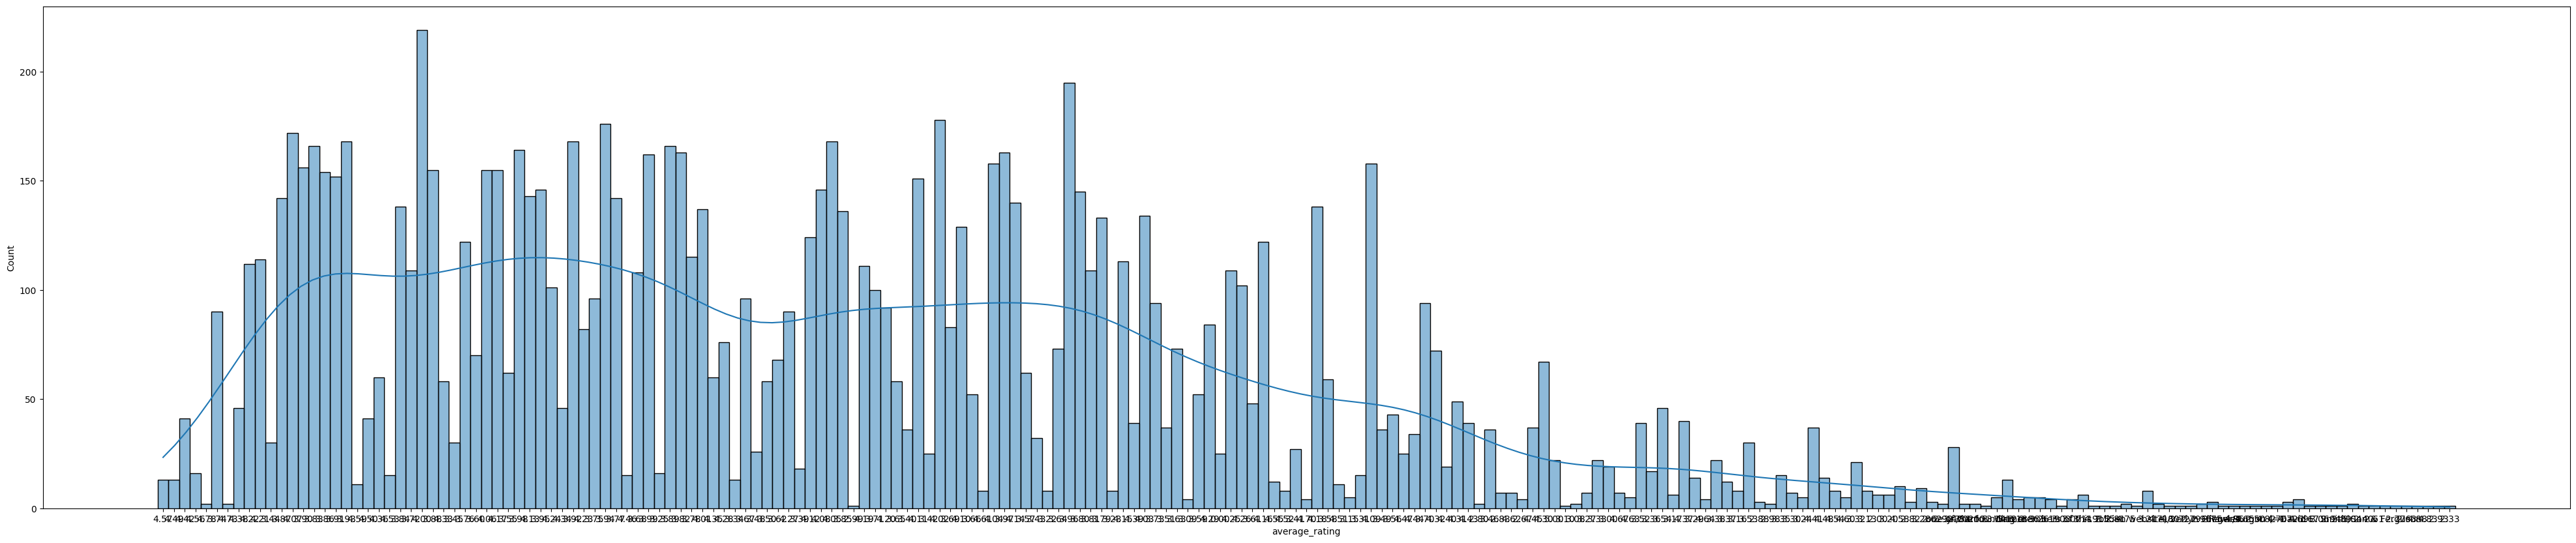

In [26]:
fig = plt.figure(figsize = (50,10))
sns.histplot(books, x = books["average_rating"], bins =30,kde= True)

In [30]:
top_authors = books["authors"].value_counts().head(10)
top_authors

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64

In [ ]:
# fig = px.bar(top_authors, x=top_authors.values, y=top_authors.index, orientation='h',
#              labels={'x': 'Number of Books', 'y': 'Author'},
#              title='Number of Books per Author')
# fig.show()

'Number of Books per Author'

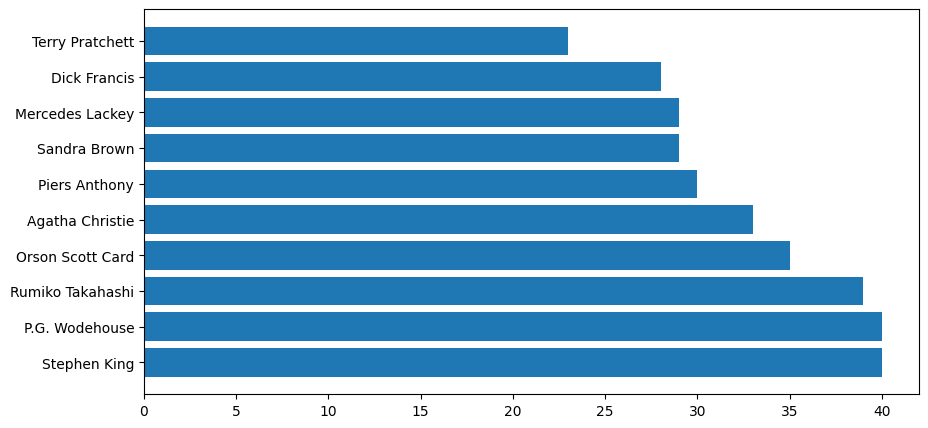

In [64]:


fig = plt.figure(figsize=(10, 5))
plt.barh(y= top_authors.index, width=top_authors.values,)
plt.xlabel
plt.ylabel
plt.title
# plt.show()

In [66]:
books['average_rating'] = pd.to_numeric(books['average_rating'],
                                       errors='coerce')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookID          11127 non-null  int64  
 1   title           11127 non-null  object 
 2   authors         11127 non-null  object 
 3   average_rating  11123 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 347.8+ KB


In [68]:
books['book_content'] = books['title'] + ' ' + books['authors']
books.head(10)

,bookID,title,authors,average_rating,book_content
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,Harry Potter and the Half-Blood Prince (Harry ...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,Harry Potter and the Order of the Phoenix (Har...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,Harry Potter and the Chamber of Secrets (Harry...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,Harry Potter and the Prisoner of Azkaban (Harr...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,Harry Potter Boxed Set Books 1-5 (Harry Potte...
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,"Unauthorized Harry Potter Book Seven News: ""Ha..."
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,Harry Potter Collection (Harry Potter #1-6) J...
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,The Ultimate Hitchhiker's Guide: Five Complete...
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,The Ultimate Hitchhiker's Guide to the Galaxy ...
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,The Hitchhiker's Guide to the Galaxy (Hitchhik...


In [71]:
print(books['book_content'][0])

Harry Potter and the Half-Blood Prince (Harry Potter  #6) J.K. Rowling/Mary GrandPré


In [78]:

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(books['book_content'])
print(books.shape)
tfidf_matrix.shape

(11127, 5)


(11127, 17937)

In [79]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(11127, 11127)

In [91]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = books[books['title'] == book_title].index[0]
    print(idx)

    # Get the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores)

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    print(len(sim_scores))

    # Get the top 5 most similar books (excluding the input book)
    sim_scores = sim_scores[1:6]
    print(sim_scores)

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]
    print(book_indices)

    # Return the top 10 recommended books
    return books['title'].iloc[book_indices]

In [92]:
book_title = "Dubliners: Text  Criticism  and Notes"
recommended_books = recommend_books(book_title)
print(recommended_books)

6189
[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.09417369834185323), (17, 0.0), (18, 0.0), (19, 0.12784424616758167), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0), (86, 0.0), (87, 0.0), (88,

# New Section